In [1]:
import pandas as pd
import numpy as np
import time
from sklearn import metrics
import math
from collections import Counter
train=pd.read_csv("iris_train.csv")
test=pd.read_csv("iris_test.csv")



# 1 List 

In [2]:
#Change it to a list in a list
X_train=list(train.values)
y_train=[]
for i in range(len(X_train)):
    y_train.append(X_train[i][-1])
    X_train[i]=list(X_train[i][:-1])

X_test=list(test.values)
y_test=[]
for i in range(len(X_test)):
    y_test.append(X_test[i][-1])
    X_test[i]=list(X_test[i][:-1])

def KNN_list(train, test, k=3):
    
    
    
    #Euclidean Distance
    def distance(x,z):
        s = 0
        for i in range(len(x)):
            s += (x[i] - z[i])**2
        return math.sqrt(s)
    
    #frequency
    def freq(List):
        k=max(set(List), key = List.count)
        return k

    
    #prediction
    def pred(train_points, test_point):
        d_list=[]
        for i in range(len(train_points)):
            d_list.append(distance(train_points[i],test_point))
        
        arg_D=np.argsort(d_list)
        li=[]
        #K-value
        for i in range(k): 
            li.append(y_train[arg_D[i]])    
        return freq(li)
    
    #the prediction list and iteration on x_test
    y_pred=[]
    for i in range(len(X_test)):
        y_pred.append(pred(X_train, X_test[i]))
    
    #Classification accuracy
    from sklearn import metrics
    accuracy=metrics.accuracy_score(y_test, y_pred)
    
    return print("Classification accuracy:",accuracy*100,'%'),y_pred
KNN_list(X_train, X_test, k=3)

Classification accuracy: 100.0 %


(None,
 ['Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica'])

# 2 Array

In [5]:
#chenge it to Numpy array
train=np.array(train)
test=np.array(test)

x_train=np.array(train[:,:-1])
y_train=np.array(train[:,-1])

x_test=np.array(test[:,:-1])
y_test=np.array(test[:,-1])

def euclidean_distance(x1, x2):
#calculates the euclidean distance between two samples
    return np.sqrt(np.sum((x1 - x2) ** 2))

def find_k_neighbors(X_train, y_train, x_test, k):
#Finds the k nearest neighbors of a test sample
    distances = np.array([euclidean_distance(x_test, x_train[i]) for i in range(X_train.shape[0])])
    sorted_indices = np.argsort(distances)
    return sorted_indices[:k]

def predict(y_train, neighbors):
    #Makes a prediction based on the majority class of the k nearest neighbors
    votes = np.array([y_train[i] for i in neighbors])
    vote_count = Counter(votes)
    return vote_count.most_common(1)[0][0]

def KNN(X_train, y_train, X_test, y_test, k=3):
    #Main KNN function that takes in train and test sets and returns predictions and accuracy
    y_pred = []
    for i in range(X_test.shape[0]):
        neighbors = find_k_neighbors(X_train, y_train, X_test[i], k)
        y_pred.append(predict(y_train, neighbors))
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return y_pred, accuracy

y_pred, accuracy = KNN(x_train, y_train, x_test, y_test, k=3)
print("Classification accuracy:", accuracy*100, '%')

Classification accuracy: 100.0 %


In [3]:
import numpy as np
from collections import Counter
from sklearn import metrics

# Convert lists to Numpy arrays
train = np.array(train)
test = np.array(test)

x_train = train[:, :-1]
y_train = train[:, -1]

x_test = test[:, :-1]
y_test = test[:, -1]

def euclidean_distance(x1, x2):
    # Calculates the Euclidean distance between two samples using Numpy's broadcasting
    return np.sqrt(np.sum((x1 - x2) ** 2))

def find_k_neighbors(X_train, y_train, x_test, k):
    # Finds the k nearest neighbors of a test sample using Numpy's broadcasting
    distances = euclidean_distance(X_train, x_test)
    sorted_indices = np.argsort(distances)
    return sorted_indices[:k]

def predict(y_train, neighbors):
    # Makes a prediction based on the majority class of the k nearest neighbors
    votes = y_train[neighbors]
    vote_count = Counter(votes)
    return vote_count.most_common(1)[0][0]

def KNN(X_train, y_train, X_test, y_test, k=3):
    # Main KNN function that takes in train and test sets and returns predictions and accuracy
    y_pred = []
    for x_test_sample in X_test:
        neighbors = find_k_neighbors(X_train, y_train, x_test_sample, k)
        y_pred.append(predict(y_train, neighbors))
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return y_pred, accuracy

y_pred, accuracy = KNN(x_train, y_train, x_test, y_test, k=3)
print("Classification accuracy:", accuracy * 100, '%')


Classification accuracy: 34.0 %


Classification accuracy: 100.0 %


Text(0, 0.5, 'Time complexity')

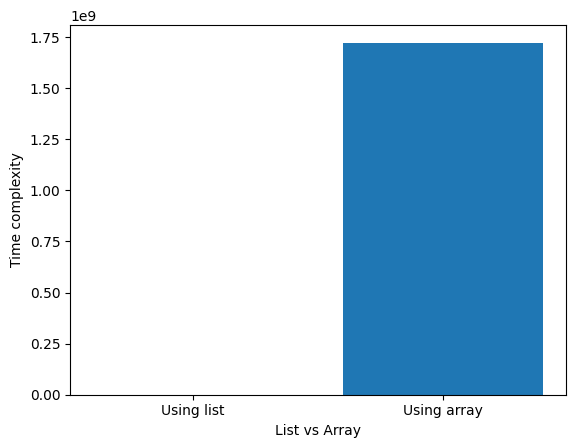

In [4]:
import matplotlib.pyplot as plt

t1=time.time()
KNN_list(X_train, X_test,k=3)
tt1=time.time()-t1

t2=time.time()
KNN(x_train, y_train, x_test, y_test, k=3)
tt2=time.time()


a=["Using list","Using array"]
b=[tt1,tt2]
plt.bar(a,b)
plt.xlabel("List vs Array")
plt.ylabel("Time complexity")
